In [39]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
%matplotlib inline

In [7]:
df = load_iris()
x = df["data"]
y = df["target"]

In [9]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x,y)

DecisionTreeClassifier()

[Text(0.5, 0.9166666666666666, 'x[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'x[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini

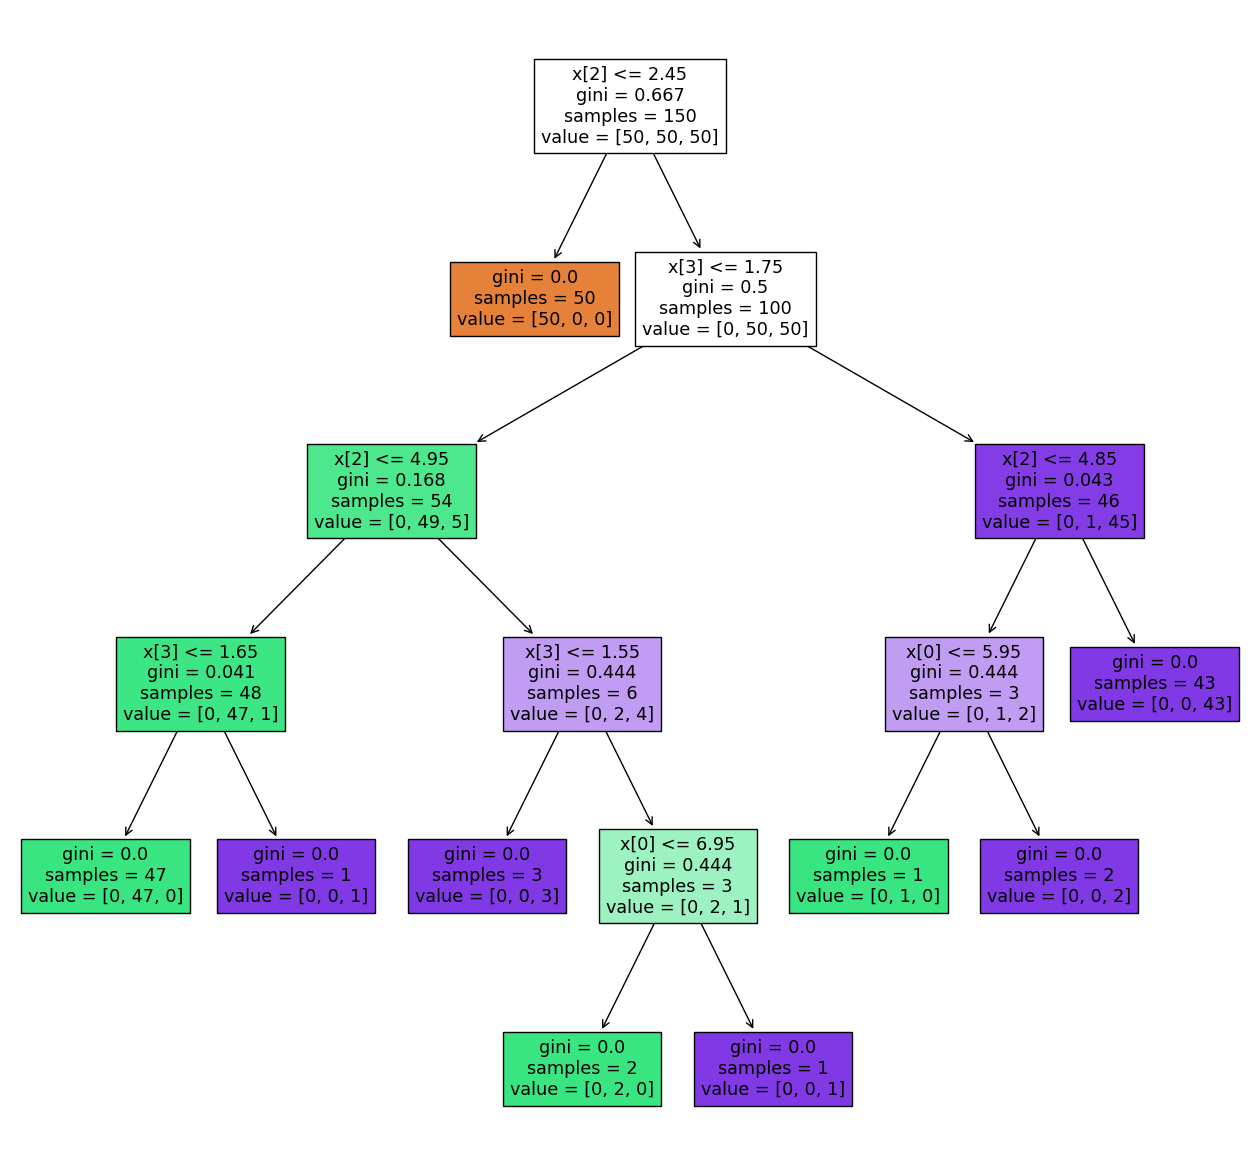

In [12]:
plt.figure(figsize = [16,15])
plot_tree(decision_tree,filled=True)

[Text(0.375, 0.875, 'x[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5, 0.625, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.25, 0.375, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.125, 0.125, 'gini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.375, 0.125, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.75, 0.375, 'x[2] <= 4.85\ngini = 0.043\nsamples = 46\nvalue = [0, 1, 45]'),
 Text(0.625, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 43\nvalue = [0, 0, 43]')]

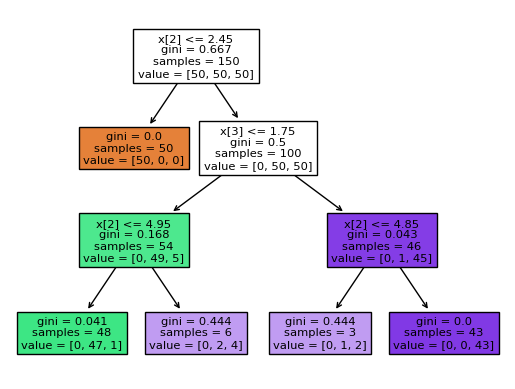

In [18]:
pruning = DecisionTreeClassifier(max_depth=3)
pruning.fit(x,y)
plot_tree(pruning,filled=True)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y)
print(x_train.shape,x_test.shape)

(112, 4) (38, 4)


In [31]:
params = {'max_depth': [2,4,6,8,10,12],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [1,2]}

estimator = DecisionTreeClassifier()
gcv = GridSearchCV(estimator,param_grid = params)
gcv.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

In [37]:
best_model = gcv.best_estimator_
print(gcv.best_score_,gcv.best_params_)

0.9727272727272727 {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 4}


[Text(0.5, 0.9, 'x[2] <= 2.45\ngini = 0.665\nsamples = 112\nvalue = [41, 37, 34]'),
 Text(0.375, 0.7, 'gini = 0.0\nsamples = 41\nvalue = [41, 0, 0]'),
 Text(0.625, 0.7, 'x[3] <= 1.75\ngini = 0.499\nsamples = 71\nvalue = [0, 37, 34]'),
 Text(0.5, 0.5, 'x[2] <= 5.05\ngini = 0.176\nsamples = 41\nvalue = [0, 37, 4]'),
 Text(0.25, 0.3, 'x[0] <= 4.95\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.125, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.375, 0.1, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.75, 0.3, 'x[0] <= 6.05\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.625, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.875, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.75, 0.5, 'gini = 0.0\nsamples = 30\nvalue = [0, 0, 30]')]

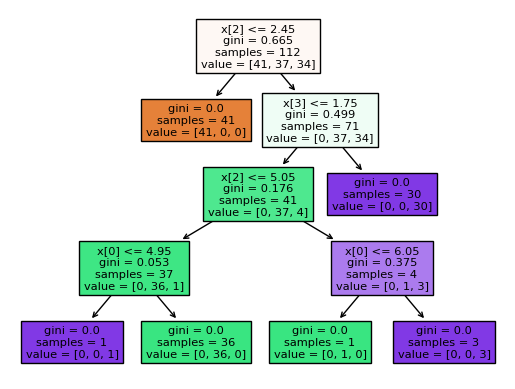

In [43]:
plot_tree(best_model,filled=True)

In [41]:
y_pred=best_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.92      0.85      0.88        13
           2       0.88      0.94      0.91        16

    accuracy                           0.92        38
   macro avg       0.93      0.93      0.93        38
weighted avg       0.92      0.92      0.92        38

